House Price Prediction using Different types of  Machine Learning Model in Python

In [55]:
# Importing Libraries and Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
dataset = pd.read_csv(r"C:\Users\sohit\Downloads\HousePricePrediction.xlsx.csv")
 
# Printing first 5 records of the dataset
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [56]:
dataset.shape


(2919, 13)

In [57]:
# Data Preprocessing
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


In [77]:
#Exploratory Data Analysis

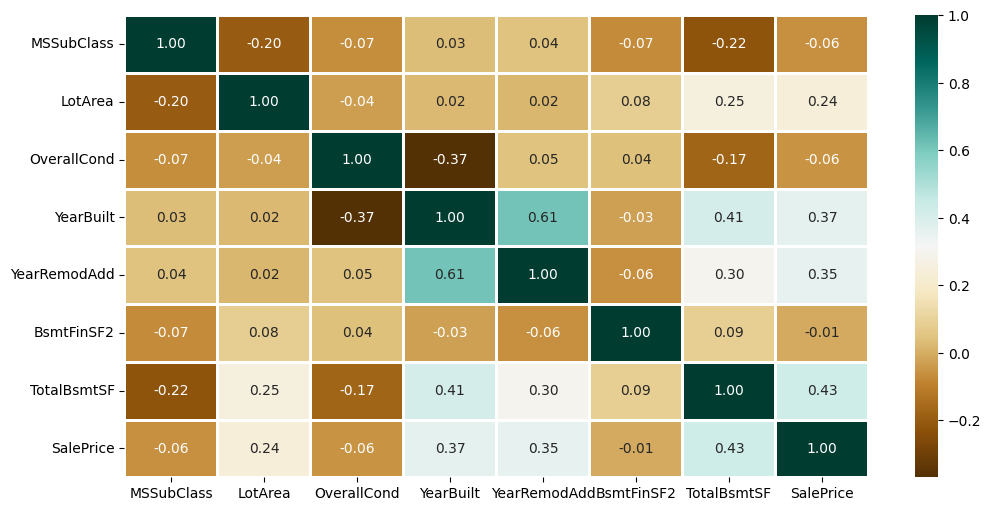

In [76]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)
plt.show()


<AxesSubplot: title={'center': 'No. Unique values of Categorical Features'}>

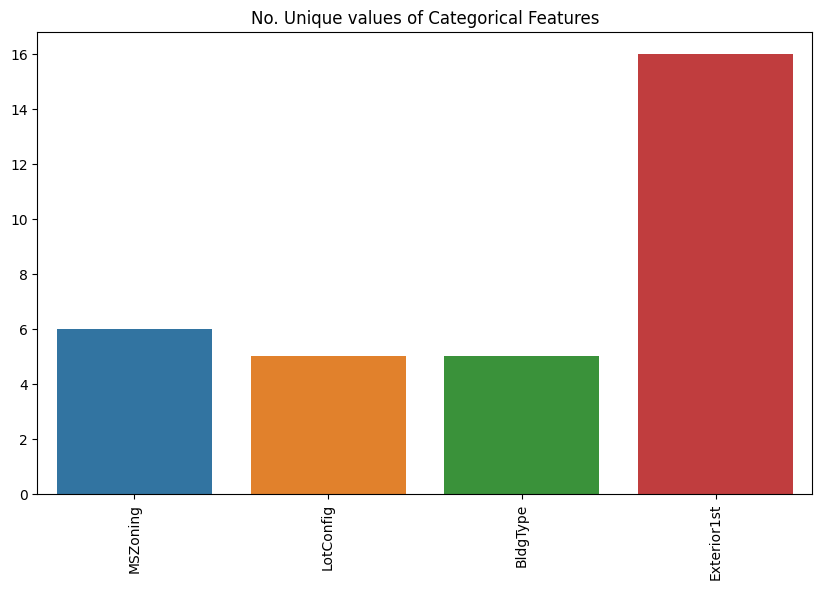

In [59]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


C:\Users\sohit\AppData\Local\Temp\ipykernel_25836\1449724743.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


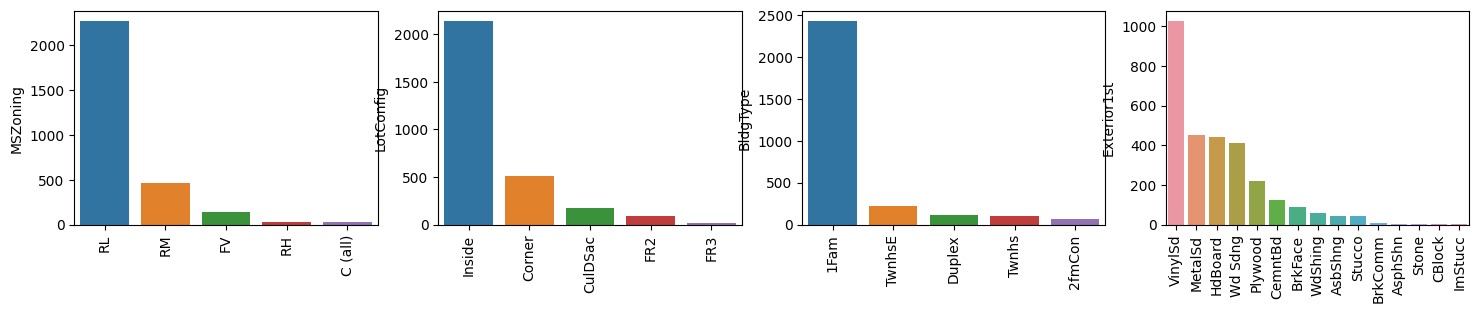

In [60]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


In [61]:
# Data cleaning
dataset = dataset.drop(['Id'], axis=1)

In [62]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())
new_dataset = dataset.dropna()
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [63]:
!pip install --upgrade scikit-learn
!pip install -U scikit-learn

from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [64]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


C:\Users\sohit\OneDrive\New folder\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [65]:
# Splitting Dataset into Training and Testing
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the dataset into features and target variable
X = df_final.drop(['SalePrice'], axis=1)
y = df_final['SalePrice']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [66]:
# SVM Model
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(y_valid, y_pred))


0.1870512931870423


In [67]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
y_pred = model_RFR.predict(X_valid)

print(mean_absolute_percentage_error(y_valid, y_pred))


0.18739706460834274


In [68]:
# linear Regression
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(y_valid, y_pred))

0.1874168384159986


In [69]:
!pip install xgboost

In [70]:
# xgboost
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
y_pred = model_xgb.predict(X_valid)

print(mean_absolute_percentage_error(y_valid, y_pred))

0.1942190062556317


In [71]:
!pip install lightgbm


In [72]:
# lightgbm
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor()
model_lgb.fit(X_train, y_train)
y_pred = model_lgb.predict(X_valid)

print(mean_absolute_percentage_error(y_valid, y_pred))

0.18984642825768855


In [73]:
!pip install CatBoost


In [74]:
# catboost
from catboost import CatBoostRegressor

model_cb = CatBoostRegressor()
model_cb.fit(X_train, y_train, verbose=100)
y_pred = model_cb.predict(X_valid)

print(mean_absolute_percentage_error(y_valid, y_pred))


Learning rate set to 0.046797
0:	learn: 56473.5753002	total: 1.37ms	remaining: 1.37s
100:	learn: 39456.0563626	total: 115ms	remaining: 1.02s
200:	learn: 35702.3004867	total: 274ms	remaining: 1.09s
300:	learn: 33081.5915302	total: 389ms	remaining: 903ms
400:	learn: 31386.8491363	total: 492ms	remaining: 735ms
500:	learn: 29752.3475583	total: 601ms	remaining: 599ms
600:	learn: 28346.9914081	total: 730ms	remaining: 485ms
700:	learn: 27271.1529210	total: 850ms	remaining: 363ms
800:	learn: 26282.1808342	total: 968ms	remaining: 240ms
900:	learn: 25291.9233241	total: 1.08s	remaining: 118ms
999:	learn: 24440.7422679	total: 1.19s	remaining: 0us
0.18178925297425216


In [75]:
# Model and accuracy


Clearly, CatBoost Regression model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.181 approx.